# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **weather phenomena** (see below) for the region of **Ann Arbor, Michigan, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Ann Arbor, Michigan, United States** to Ann Arbor, USA. In that case at least one source file must be about **Ann Arbor, Michigan, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Ann Arbor, Michigan, United States** and **weather phenomena**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **weather phenomena**?  For this category you might want to consider seasonal changes, natural disasters, or historical trends.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

<H1> Bike Sharing </H1>

In this report I`ll be using the bike sharing dataset available on UCI Machine Learning repository.

https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset
    
The main goal here is, by using vizualization, get insight on what are the variables that most influences on bike sharing.

Below you may find a simple data dict:
    
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered
    
** Both hour.csv and day.csv have the same information. So I`ll be using only day.csv **

In [5]:
##imports
import requests, zipfile, io, os
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [10]:
### creates a directory for the project, if it not exists
def downloadData():

    if not os.path.exists('bikesharing'):
        os.makedirs('bikesharing')
    os.chdir(str(os.getcwd())+'/bikesharing')

    ### download raw data
    r = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip')
    z = zipfile.ZipFile(io.BytesIO(r.content))
    z.extractall()

    ## check downloaded data
    os.listdir()

In [6]:
#downloadData()
os.chdir(str(os.getcwd())+'/bikesharing')

In [7]:
###loads data into pandas dataframe

df_hour = pd.read_csv('hour.csv')
df_day = pd.read_csv('day.csv')

print(df_hour.shape)
print(df_day.shape)

(17379, 17)
(731, 16)


In [8]:
### take a look at data

df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [9]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [11]:
### check if it was imported correctly

df_hour.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [12]:
df_day.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

** In both databases variables like season, yr, mnth, holiday, weekday, workingday, weathersit should be categorical variables. I`ll import it again enforcing the correct datatype. **



In [13]:
df_hour = pd.read_csv('hour.csv', dtype={'season': str,'yr':str, 'mnth':str, 'hr':str, 'holiday':str, 'weekday':str, 
                                         'workingday':str, 'weathersit':str})
df_day = pd.read_csv('day.csv', dtype={'season': str,'yr':str, 'mnth':str, 'holiday':str, 'weekday':str, 
                                         'workingday':str, 'weathersit':str})

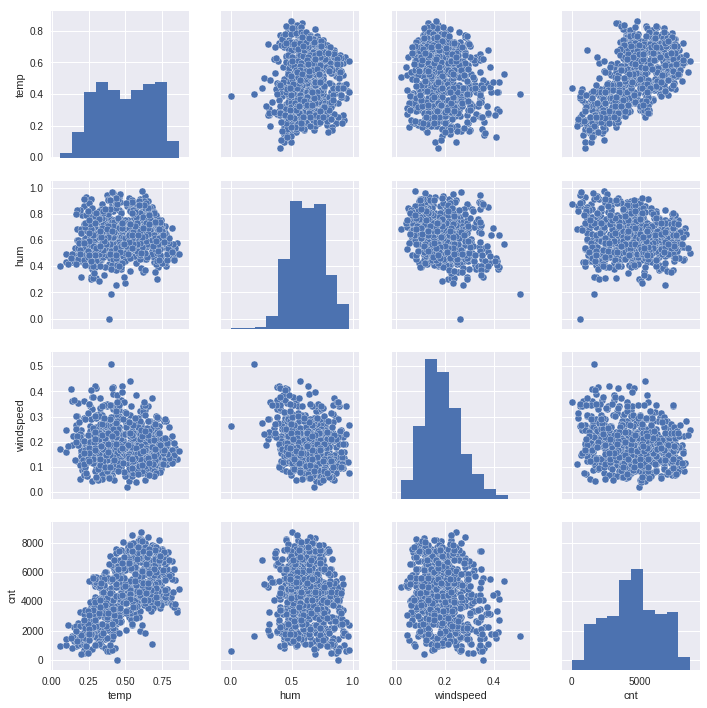

In [14]:
#### A Pairplot to check overall behavior of numerical data.
plt.clf()
g = sns.pairplot(df_day[['temp','hum','windspeed','cnt']])
plt.show()

**so, by the plot above we can see that the temperature has an an influence on cnt. Let's take a better look at this by using the season temperature**

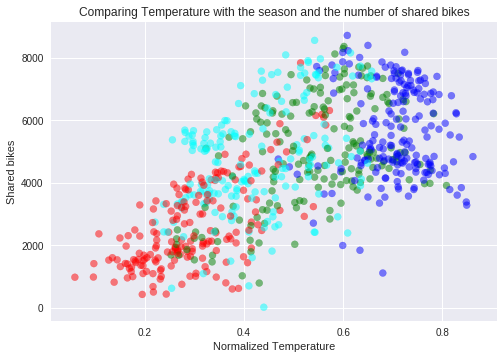

In [26]:
#### A Scatterplot to check overall behavior of numerical data.
plt.clf()
dct = {'1':'red','2':'green','3':'blue','4':'cyan'}
plt.scatter(df_day.temp, df_day.cnt, c=[dct[x] for x in df_day.season], alpha=0.5)
plt.title('Comparing Temperature with the season and the number of shared bikes')
plt.xlabel('Normalized Temperature')
plt.ylabel('Shared bikes')
plt.show()
# season (1:winter, 2:spring, 3:summer, 4:fall)

** By the season it's clear that the number of shared bikes is accordly to the temperature. We still have available on our dataset the weather situation, which shows how was the weather condition in the day that the rent took place. **

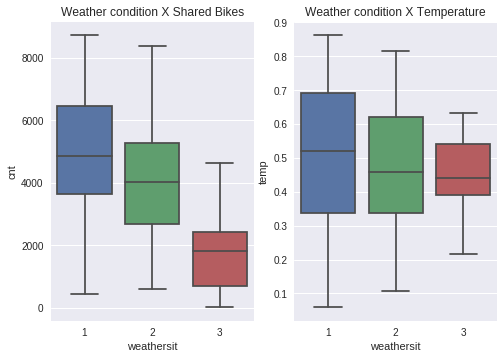

In [22]:
plt.clf()
fig, ax = plt.subplots(1,2)
sns.boxplot(x='weathersit', y='cnt', data = df_day, ax=ax[0]).set_title('Weather condition X Shared Bikes')
sns.boxplot(x='weathersit', y='temp', data = df_day, ax=ax[1]).set_title('Weather condition X Temperature')
plt.show()

**So by far, there is evidences that temperature has direct impact on the number of shared bikes.**